In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns

In [205]:
#loading the excel file
data=pd.read_csv("C:\\Users\\Kalpa.Trader\\Desktop\\Python Cohort\\Data\\USDINR.csv")

In [206]:
#adding other relevent rows
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Expiry']=pd.to_datetime(data['Expiry'])
data['Points']=data['Adjusted Price(average)']-data['Adjusted Price(average)'].shift(1)
data['Day_of_week']=data['Timestamp'].dt.dayofweek
data['daily%']=data['Points']/data['Adjusted Price(average)']*100
data['position']=np.where((data['Day_of_week']==4) & (data['Day_of_week'].shift(-1)==0),1,0)
data['gain%']=data['position'].shift(1) * data['daily%']

In [207]:
# Replacing Nan values
data['gain%'].fillna(0, inplace=True)


In [208]:
#cutting the dataframe to remove noise
data_cut=pd.DataFrame({'Date': data['Timestamp'],'Price':data['Adjusted Price(average)'],'Position':data['position'],'returns':data['daily%'],'gain%':data['gain%']})

In [209]:
data_cut.head()

,Date,Price,Position,returns,gain%
0,2010-10-29,44.74250,1,NaN,0.000000
1,2010-11-01,44.67750,0,-0.145487,-0.145487
2,2010-11-02,44.62000,0,-0.128866,-0.000000
3,2010-11-03,44.51500,0,-0.235876,-0.000000
4,2010-11-04,44.29375,0,-0.499506,-0.000000


In [210]:
data_cut['gain%'].fillna(0, inplace=True)
data_cut['returns'].fillna(0, inplace=True)

In [211]:
data1=data_cut[data_cut['gain%']!=0]
data1.head()

,Date,Price,Position,returns,gain%
1,2010-11-01,44.6775,0,-0.145487,-0.145487
10,2010-11-15,45.3300,0,0.854842,0.854842
14,2010-11-22,45.4450,0,0.236550,0.236550
19,2010-11-29,46.1625,0,0.097482,0.097482
24,2010-12-06,45.1825,0,-0.282189,-0.282189


# calculating all metrics for 1X leverage 

Enter the leverage value: 2
Buy and Hold Returns : 69.41 %
Strategy Returns : 204.60 %
Maximum Drawdown : -8.62 % 
Trades  : 512
Wins : 303
Losses : 209
Win Rate : 59.18 %
Best Trade : 1.96 %
Worst Trade : -1.12 %
Average Gain : 0.11 %
Volatility (Ann) : 6.66 %
Sharpe Ratio : 0.26 
Sortino Ratio : 0.59 
Calmar Ratio : 1.29 


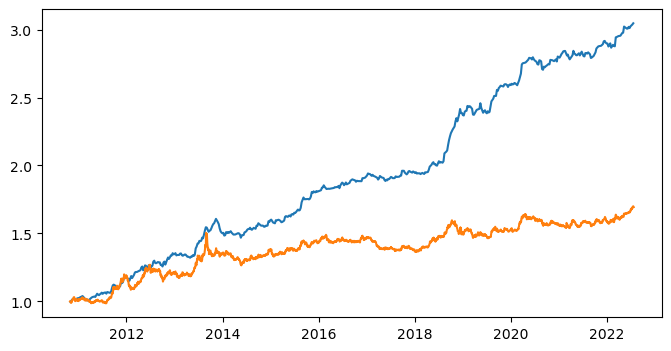

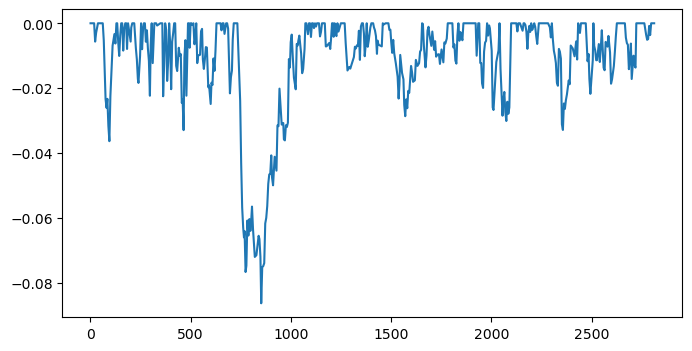

In [212]:

def backtesting_parameters():

    leverage = float(input("Enter the leverage value: "))    
    
#generate equity curve
    equity_curve = (1 + (leverage*(data1['gain%']/100)) ).cumprod()
    buy_n_hold = (1+data_cut['returns']/100).cumprod()
    end = equity_curve.iloc[-1]-1
    end2 = buy_n_hold.iloc[-1]-1
    plt.figure(figsize=(8,4))
    plt.plot(data1['Date'], equity_curve)
    plt.plot(data_cut['Date'], buy_n_hold) 
    
# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    plt.figure(figsize=(8,4))
    plt.plot(drawdown)
           
    
# Trade parameters
    trades=data_cut['Position'].sum()
    wins= (data_cut['gain%']>0).sum()
    losses = trades - wins
    win_rate = wins/trades
    Best_Trade = data1['gain%'].max()
    Worst_Trade = data1['gain%'].min()
    Average_Trade = data1['gain%'].mean()
    Max_DD = drawdown.min()
#returns for buy and hold vs strategy
    bnh_ret = (data_cut['returns']/100+1).prod() -1
    str_ret = (data_cut['gain%']+1).prod() -1
    
    
# Ratios and Volatility
# Risk Free rate assumed to be 0
    vol = data1['gain%'].std()*(252**0.5)
    sharpe = data1['gain%'].mean()/data1['gain%'].std()
    down_return = data1['gain%'].where(data1['gain%']<0,0)
    sortino = data1['gain%'].mean()/down_return.std()
    calmar = data1['gain%'].mean()/abs(drawdown.min())
        
    print(f"Buy and Hold Returns : {end2*100:.2f} %")
    print(f"Strategy Returns : {end*100:.2f} %")
    print(f"Maximum Drawdown : {Max_DD*100:.2f} % ")
    print(f"Trades  : {trades}")
    print(f"Wins : {wins}")
    print(f"Losses : {losses}")
    print(f"Win Rate : {win_rate*100:.2f} %")
    print(f"Best Trade : {Best_Trade:.2f} %")
    print(f"Worst Trade : {Worst_Trade:.2f} %")
    print(f"Average Gain : {Average_Trade:.2f} %")
    print(f"Volatility (Ann) : {vol:.2f} %")
    print(f"Sharpe Ratio : {sharpe:.2f} ")
    print(f"Sortino Ratio : {sortino:.2f} ")
    print(f"Calmar Ratio : {calmar:.2f} ")
    
backtesting_parameters()

# Backtest Parameters